# Setup

In [1]:
%load_ext autoreload
%autoreload 2

from crispr import Spatial
import scanpy as sc
import squidpy as sq
import functools
import os
from os import system
import pandas as pd

ddd = os.path.join(os.path.expanduser("~"), "projects/data/public/visium")

pd.options.display.max_columns = 100

# genes = ["CDKN1A", "CDKN2A", "TP53", "PLAUR",
#          "PTGER4", "ATG16L1", "NOD2", "LACC1"]
# cell_types = None
# palette = "tab20"

genes = dict(CSF=["CSF2", "CSF2RB", "CSF2RA"],
             All_ILCs=["IL7R"],
             ILC1=["TBX21", "KLRB1", "CCL5", "HSP90AA1", "IFNG"],
             ILC3=["RORC", "IL23R", "KIT", "CCL20", "TCF7", "IL22"],
             Cytokines=["IFNG", "IL22"])  # ILC1 & ILC3, respectively
cell_types = ["ILC3", "LTi-like NCR+ ILC3", "LTi-like NCR- ILC3",
              "ILCP", "Macrophages", "Stem cells"]
# palette = ["r", "tab:pink", "m", "b", "tab:brown", "cyan"]
palette = "tab10"

kws_pp = dict(cell_filter_pmt=[0, 100], cell_filter_ncounts=None,
              cell_filter_ngene=[0, None], gene_filter_ncell=[3, None],
              gene_filter_ncounts=None)  # can call using 1 arguments

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

# Data

In [3]:
selves = []
for s in zip(["Post-Xenium"], ["_Post_Xenium"]):
    for i, n in enumerate(["Rep1", "Rep2"]):
        d_p = os.path.join(ddd, f"CytAssist_FFPE_Human_Colon/{s[0]}/{n}")
        self = Spatial(d_p, visium=True, col_cell_type="leiden")
        self.adata.obs = self.adata.obs.assign(Condition=s[0])
        self.adata.obs = self.adata.obs.assign(Replicate=i)
        self.adata.obs = self.adata.obs.assign(Sample=f"{s[0]}_{n}")
        # self._columns["col_sample_id"] = "Sample"
        # self._columns["col_condition"] = "Condition"
        selves += [self]



<<< INITIALIZING SPATIAL CLASS OBJECT >>>



<<< INITIALIZING OMICS CLASS OBJECT >>>

Unused keyword arguments: {'spatial': True, 'visium': True, 'file_path_spatial': None}.

col_gene_symbols="gene_symbols"
col_cell_type="leiden"
col_sample_id=None
col_batch=None
col_subject=None
col_condition=None
col_num_umis=None
key_control=None
key_treatment=None
dsfasfda AnnData object with n_obs × n_vars = 6518 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


Cell Counts: Initial


Observations: 6518



Gene Counts: Initial

Empty DataFrame
Columns: [index, gene_ids, feature_types, genome]
Index: []





 AnnData object with n_obs × n_vars = 6518 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
    layers: 'counts'


 AnnData object with n_obs × n_vars = 6518 × 18085
    obs: 'in_tissue', 'array_row', 'array_co

## Preprocessing


Un-Used Keyword Arguments: {'assay_protein': None, 'col_sample_id': None, 'col_batch': None, 'col_subject': None, 'col_condition': None, 'col_num_umis': None}




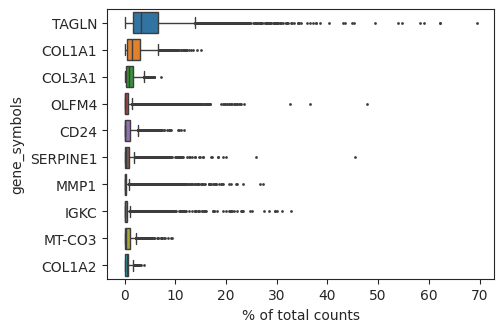

dsfasfda AnnData object with n_obs × n_vars = 6352 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'Condition', 'Replicate', 'Sample', 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
    layers: 'counts'


Cell Counts: Initial


Observations: 6352



Gene Counts: Initial

Empty DataFrame
Columns: [gene_symbols, gene_ids, feature_types, genome]
Index: []




<<< PERFORMING QUALITY CONTROL ANALYSIS>>>

	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...




... storing 'Condition' as categorical
... storing 'Sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


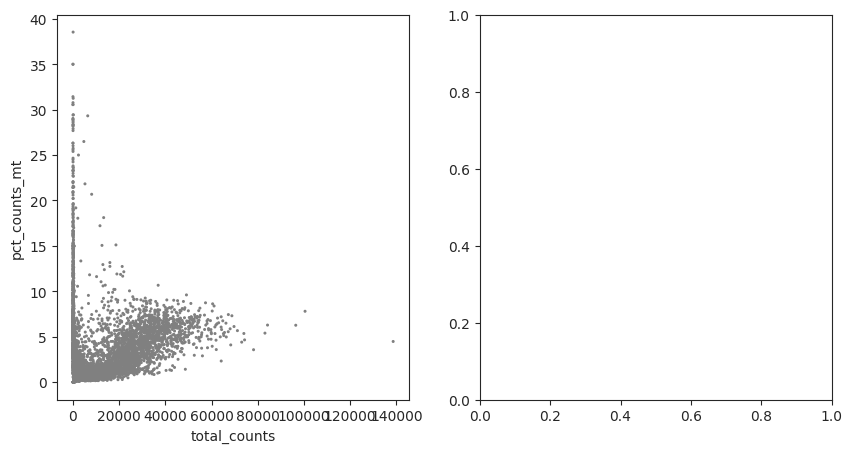


<<< FILTERING CELLS (TOO FEW GENES) & GENES (TOO FEW CELLS) >>>
dsfasfda AnnData object with n_obs × n_vars = 6352 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'Condition', 'Replicate', 'Sample', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'
    layers: 'counts'


Cell Counts: Post-Basic Filter


Observations: 6352



Gene Counts: Post-Basic Filter

     n_cells_by_counts  mean_counts  log1p_mean_counts  pct_dropout_by_counts  \
25%              105.0     0.017475           0.017324          

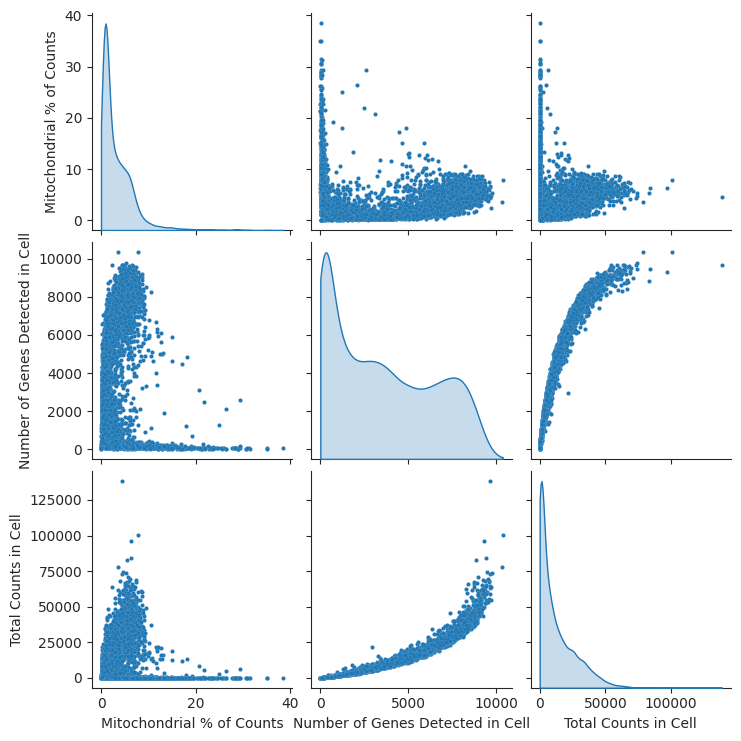

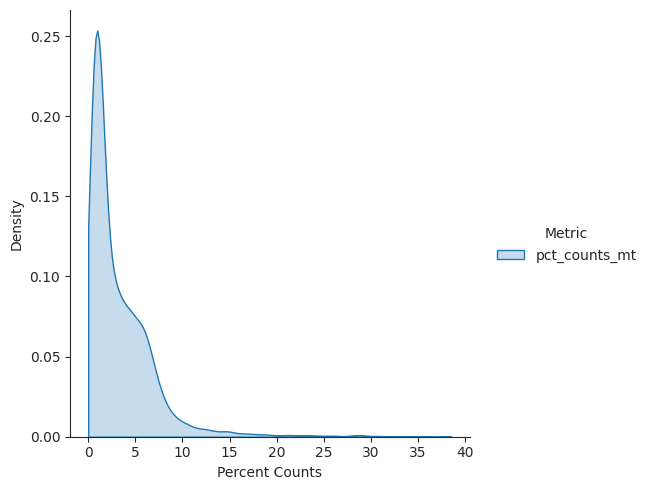

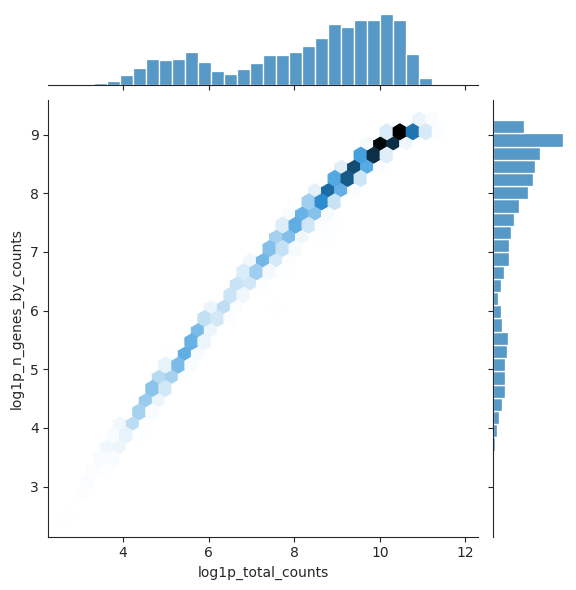

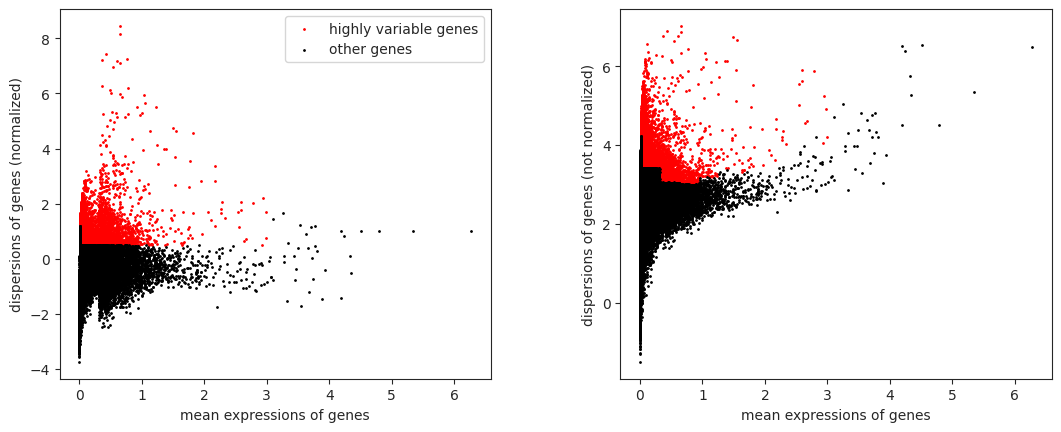


<<< NORMALIZING RAW GENE EXPRESSION >>>

	*** Scaling gene expression...

	*** Scaling => `.X` & scaled layer...
dsfasfda AnnData object with n_obs × n_vars = 6352 × 18015
    obs: 'in_tissue', 'array_row', 'array_col', 'Condition', 'Replicate', 'Sample', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'
    layers: 'counts', 'log1p', 'scaled'


Cell Counts: Post-Processing


Observations: 6352



Gene C

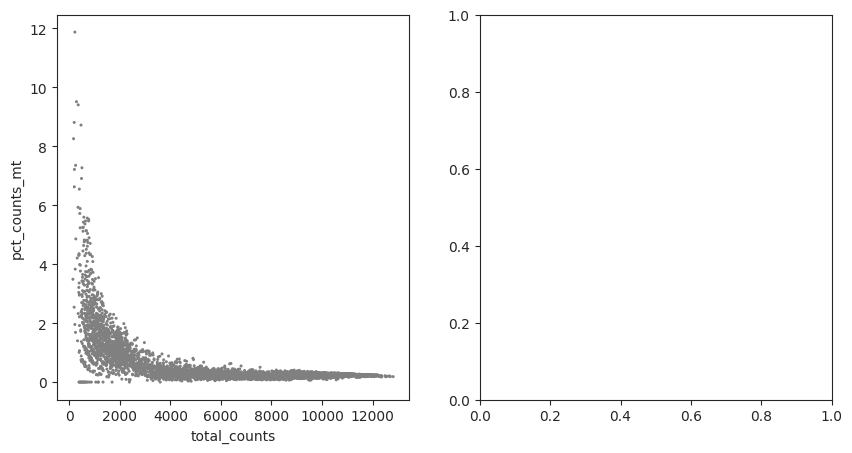

<class 'anndata._core.anndata.AnnData'>
CPU times: user 37.9 s, sys: 31.4 s, total: 1min 9s
Wall time: 16.8 s


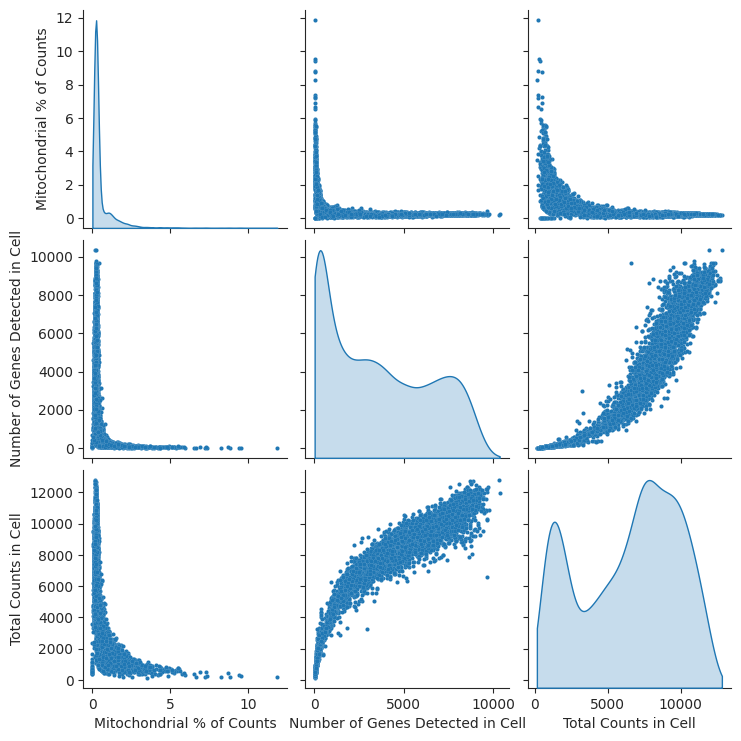

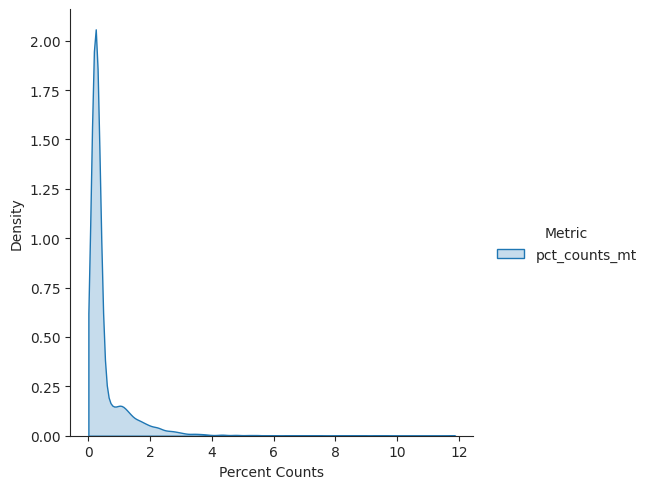

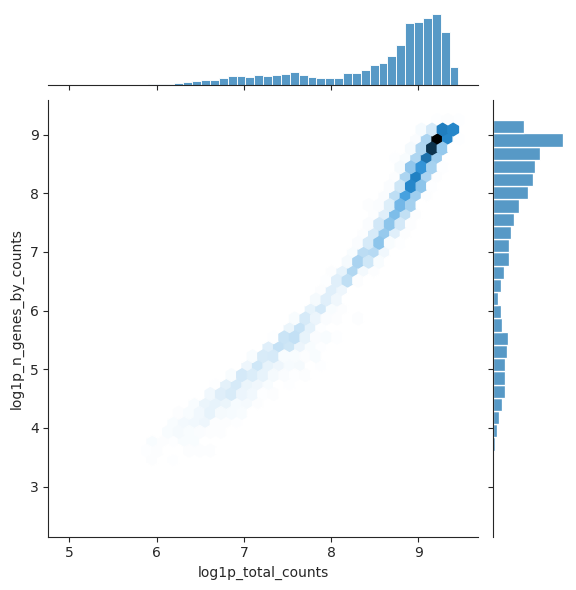

In [13]:
%%time

_ = self.preprocess(**kws_pp)

## Clustering



Un-used Keyword Arguments: {'assay': None, 'col_gene_symbols': 'gene_symbols', 'col_cell_type': 'leiden', 'col_sample_id': None, 'col_batch': None, 'col_subject': None, 'col_condition': None, 'col_num_umis': None, 'key_control': None, 'key_treatment': None}


<<< PERFORMING PCA >>>

 {'use_highly_variable': True}


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING: UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


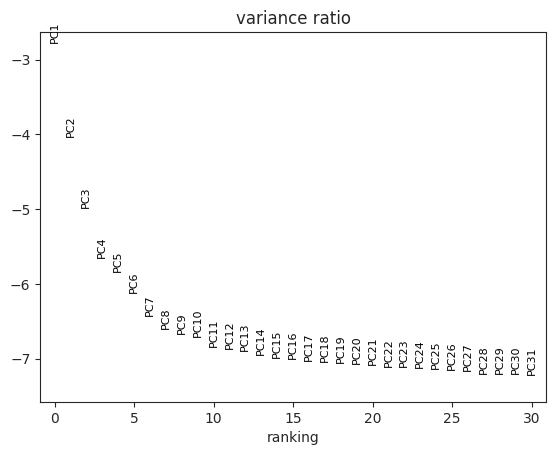

... storing 'assay_protein' as categorical
... storing 'col_gene_symbols' as categorical
... storing 'col_cell_type' as categorical
... storing 'col_sample_id' as categorical
... storing 'col_batch' as categorical
... storing 'col_subject' as categorical
... storing 'col_condition' as categorical
... storing 'col_num_umis' as categorical
... storing 'cell_filter_pmt' as categorical
... storing 'cell_filter_ncounts' as categorical
... storing 'cell_filter_ngene' as categorical
... storing 'gene_filter_ncell' as categorical
... storing 'gene_filter_ncounts' as categorical
... storing 'kws_scale' as categorical
... storing 'method_cluster' as categorical


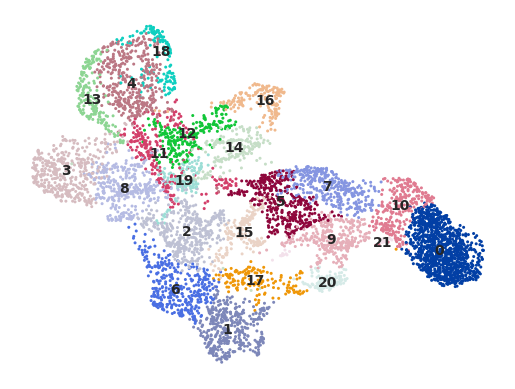

CPU times: user 24min 50s, sys: 30min 48s, total: 55min 39s
Wall time: 3min 54s


In [14]:
%%time

_ = self.cluster()

# Variables

In [15]:
cell_types = list(self.rna.obs[self._columns["col_cell_type"]].sample(3))

# Centrality Scores

In [ ]:
%%time

self.calculate_centrality(n_jobs=4)

# Cell Type Co-Occurrence

In [ ]:
self.rna.uns["spatial"]

In [ ]:
%%time

_ = self.find_cooccurrence(key_cell_type=cell_types, figsize=(60, 20),
                           palette=palette, kws_plot=dict(wspace=3))

# Neighbors Enrichment Analysis

In [ ]:
%%time

_ = self.calculate_neighborhood(figsize=(60, 30), cmap="coolwarm",
                                cbar_range=[-30, 30])

# Spatially-Variable Genes

In [ ]:
%%time

ggg = genes if genes and isinstance(genes, dict) else {"Genes": genes}
genes_all = functools.reduce(lambda i, j: i + j, [ggg[g] for g in ggg])
# for g in ggg:
#   self.find_svgs(genes=ggg[g])
fig = self.find_svgs(
    genes=genes_all, method="moran", n_perms=10, kws_plot=dict(
        wspace=0.1, cmap="coolwarm", vcenter=0, size=3,
        legend_fontsize="large"), figsize=(15, 15))

# Receptor-Ligand Interactions

In [ ]:
%%time

out = self.calculate_receptor_ligand(
    key_sources=cell_types, key_targets=cell_types, col_condition=False,
    p_threshold=0.001, remove_ns=True, figsize=(15, 10))

In [ ]:
os.listdir(self._dir)

In [ ]:
self.adata.uns["spatial"]